In [1]:
# importing basic packages
import numpy as np 
import pandas as pd 
import datetime 
# Viz
import matplotlib.pyplot as plt 
import seaborn as sns 
import mlxtend
from mlxtend.plotting import heatmap
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.ensemble import RandomForestRegressor

# settings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the datasets
features = pd.read_csv('https://raw.githubusercontent.com/vishu3883/DATA_606/main/DATASETS/features.csv')
train    = pd.read_csv('https://raw.githubusercontent.com/vishu3883/DATA_606/main/DATASETS/stores.csv')
stores   = pd.read_csv('https://raw.githubusercontent.com/vishu3883/DATA_606/main/DATASETS/train.csv')

In [3]:
df_names=['features','stores','train']
df_list=[features,stores,train]
for i in range(3):
    print('--'*25)
    print(f'Dataframe {df_names[i]} has {df_list[i].shape[0]} rows and {df_list[i].shape[1]} columns.')
    print('--'*25)
    display(df_list[i].head(5))

--------------------------------------------------
Dataframe features has 8190 rows and 12 columns.
--------------------------------------------------


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


--------------------------------------------------
Dataframe stores has 45 rows and 3 columns.
--------------------------------------------------


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


--------------------------------------------------
Dataframe train has 421570 rows and 5 columns.
--------------------------------------------------


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
#merging the data
df1= train.merge(stores, how='left').merge(features, how='left')
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [5]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = pd.to_datetime(df1['Date']).dt.year
df1['Month'] = pd.to_datetime(df1['Date']).dt.month
df1['Week'] = pd.to_datetime(df1['Date']).dt.week
df1['Day'] = pd.to_datetime(df1['Date']).dt.day
df1.replace({'A': 1, 'B': 2,'C':3},inplace=True)
df1['IsHoliday'] = df1['IsHoliday'].apply(lambda x: 1 if x == True else 0)
df1.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5
1,1,1,2010-02-12,46039.49,1,1,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,6,12
2,1,1,2010-02-19,41595.55,0,1,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,7,19
3,1,1,2010-02-26,19403.54,0,1,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,8,26
4,1,1,2010-03-05,21827.90,0,1,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,9,5


In [6]:
df1.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Day
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,0.070358,1.589912,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,2010.968591,6.449510,25.826762,15.673131
std,12.785297,30.492054,22711.183519,0.255750,0.666337,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,0.796876,3.243217,14.151887,8.753549
min,1.000000,1.000000,-4988.940000,0.000000,1.000000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,2010.000000,1.000000,1.000000,1.000000
25%,11.000000,18.000000,2079.650000,0.000000,1.000000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,2010.000000,4.000000,14.000000,8.000000
50%,22.000000,37.000000,7612.030000,0.000000,1.000000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,2011.000000,6.000000,26.000000,16.000000
75%,33.000000,74.000000,20205.852500,0.000000,2.000000,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,2012.000000,9.000000,38.000000,23.000000
max,45.000000,99.000000,693099.360000,1.000000,3.000000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2012.000000,12.000000,52.000000,31.000000


In [7]:
#Calculating the missing values in the dataframe
print('Percentage of the missing values.')
(100*df1.isna().sum()/df1.shape[0]).sort_values()

Percentage of the missing values.


Store            0.000000
Month            0.000000
Year             0.000000
Unemployment     0.000000
CPI              0.000000
Week             0.000000
Fuel_Price       0.000000
Day              0.000000
Size             0.000000
Type             0.000000
IsHoliday        0.000000
Weekly_Sales     0.000000
Date             0.000000
Dept             0.000000
Temperature      0.000000
MarkDown5       64.079038
MarkDown1       64.257181
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown2       73.611025
dtype: float64

In [8]:
#Replacing the null values in markdown columns with 0
df1.iloc[:,9:14]=df1.iloc[:,9:14].fillna(0)

In [9]:
print('Percentage of the missing values.')
(100*df1.isna().sum()/df1.shape[0]).sort_values()

Percentage of the missing values.


Store           0.0
Month           0.0
Year            0.0
Unemployment    0.0
CPI             0.0
MarkDown5       0.0
MarkDown4       0.0
MarkDown3       0.0
MarkDown2       0.0
MarkDown1       0.0
Fuel_Price      0.0
Temperature     0.0
Size            0.0
Type            0.0
IsHoliday       0.0
Weekly_Sales    0.0
Date            0.0
Dept            0.0
Week            0.0
Day             0.0
dtype: float64

In [10]:
#Creating a markdown variable in the dataframe which is equal to 1 if any of the markdown is equal to 1, otherwise 0
df1['markdown'] = df1.iloc[:,9:14].sum(axis=1)
df1['markdown'] = df1['markdown'].apply(lambda x:0 if x==0 else 1)

In [11]:
df1.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [12]:
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,markdown
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,211.096358,8.106,2010,2,5,5,0
1,1,1,2010-02-12,46039.49,1,1,151315,38.51,2.548,211.242170,8.106,2010,2,6,12,0
2,1,1,2010-02-19,41595.55,0,1,151315,39.93,2.514,211.289143,8.106,2010,2,7,19,0
3,1,1,2010-02-26,19403.54,0,1,151315,46.63,2.561,211.319643,8.106,2010,2,8,26,0
4,1,1,2010-03-05,21827.90,0,1,151315,46.50,2.625,211.350143,8.106,2010,3,9,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,2,118221,64.88,3.997,192.013558,8.684,2012,9,39,28,1
421566,45,98,2012-10-05,628.10,0,2,118221,64.89,3.985,192.170412,8.667,2012,10,40,5,1
421567,45,98,2012-10-12,1061.02,0,2,118221,54.47,4.000,192.327265,8.667,2012,10,41,12,1
421568,45,98,2012-10-19,760.01,0,2,118221,56.47,3.969,192.330854,8.667,2012,10,42,19,1


In [13]:
#Moving the target variable 'Weekly_Sales' to the end of the dataframe. It will be easy to read the corr matrix 
cols = list(df1.columns)
cols.pop(cols.index('Weekly_Sales')) 
df1 = df1[cols+['Weekly_Sales']]
df1.head(5)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,markdown,Weekly_Sales
0,1,1,2010-02-05,0,1,151315,42.31,2.572,211.096358,8.106,2010,2,5,5,0,24924.50
1,1,1,2010-02-12,1,1,151315,38.51,2.548,211.242170,8.106,2010,2,6,12,0,46039.49
2,1,1,2010-02-19,0,1,151315,39.93,2.514,211.289143,8.106,2010,2,7,19,0,41595.55
3,1,1,2010-02-26,0,1,151315,46.63,2.561,211.319643,8.106,2010,2,8,26,0,19403.54
4,1,1,2010-03-05,0,1,151315,46.50,2.625,211.350143,8.106,2010,3,9,5,0,21827.90


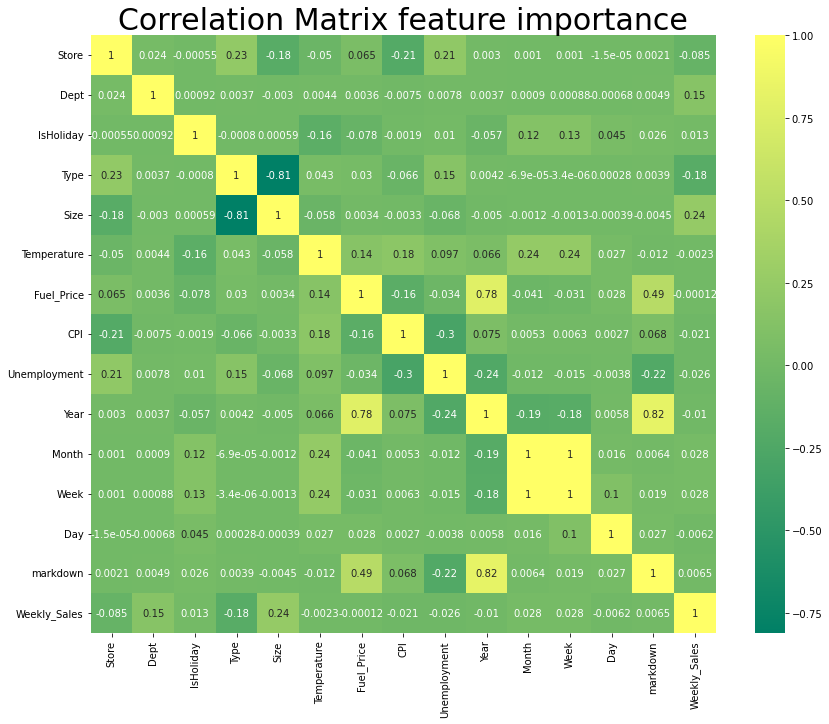

In [14]:
plt.figure(figsize=(14,11))
sns.heatmap(df1.corr(), cmap='summer', annot=True)
plt.title('Correlation Matrix feature importance', fontsize=30)
plt.show()

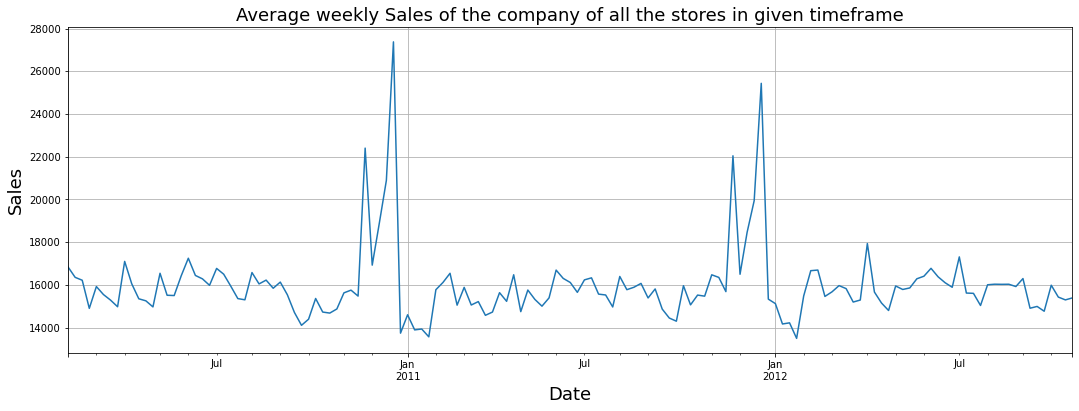

In [15]:
plt.figure(figsize=(18,6))
df1.groupby('Date')['Weekly_Sales'].mean().plot()
plt.grid()
plt.title('Average weekly Sales of the company of all the stores in given timeframe', fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.xlabel('Date', fontsize=18);

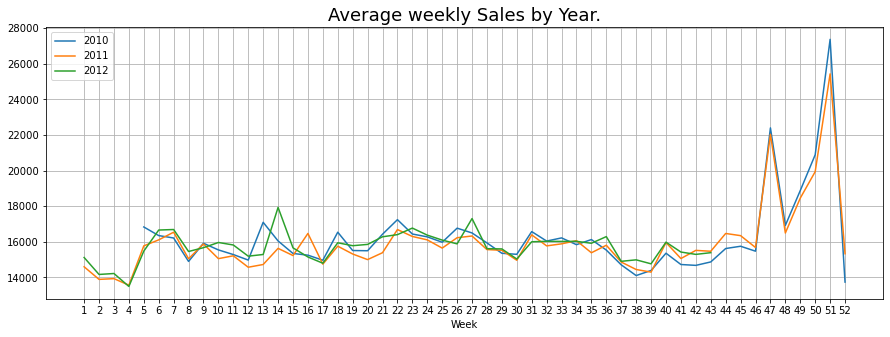

In [16]:
weekly_sales = df1.groupby(['Year','Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2010 = df1.loc[df1['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2011 = df1.loc[df1['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2012 = df1.loc[df1['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
plt.figure(figsize=(15, 5))
sns.lineplot(weekly_sales2010['Weekly_Sales']['mean'].index, weekly_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2011['Weekly_Sales']['mean'].index, weekly_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2012['Weekly_Sales']['mean'].index, weekly_sales2012['Weekly_Sales']['mean'].values)

plt.grid()
plt.title('Average weekly Sales by Year.', fontsize=18)
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'])
plt.show()

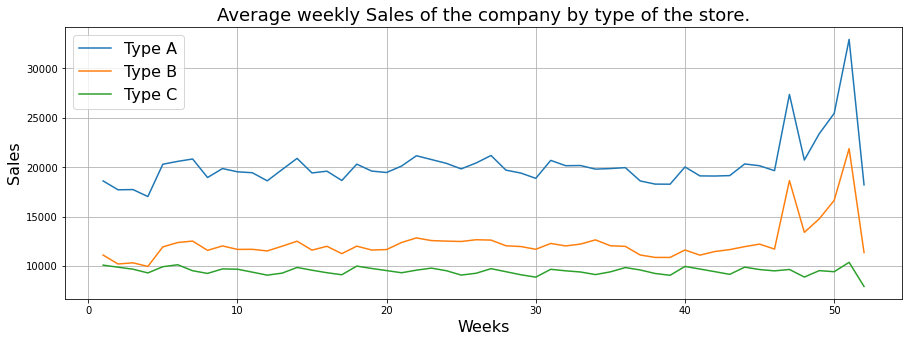

In [17]:
plt.figure(figsize=(15,5))
df1[df1['Type']==1].groupby('Week').mean()['Weekly_Sales'].plot()
df1[df1['Type']==2].groupby('Week').mean()['Weekly_Sales'].plot()
df1[df1['Type']==3].groupby('Week').mean()['Weekly_Sales'].plot()
plt.grid()
plt.title('Average weekly Sales of the company by type of the store.', fontsize=18)
plt.legend(['Type A', 'Type B', 'Type C'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Weeks', fontsize=16);

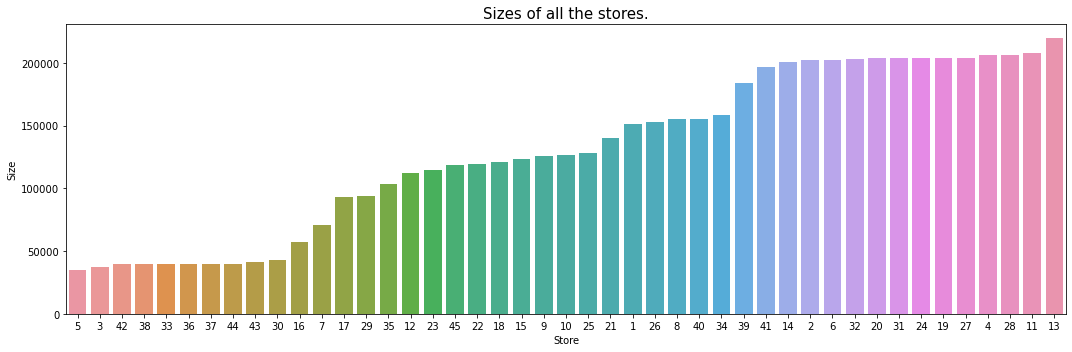

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Size',data=stores,order=stores.sort_values('Size')['Store'].tolist())
plt.title('Sizes of all the stores.',fontsize=15)
plt.tight_layout();

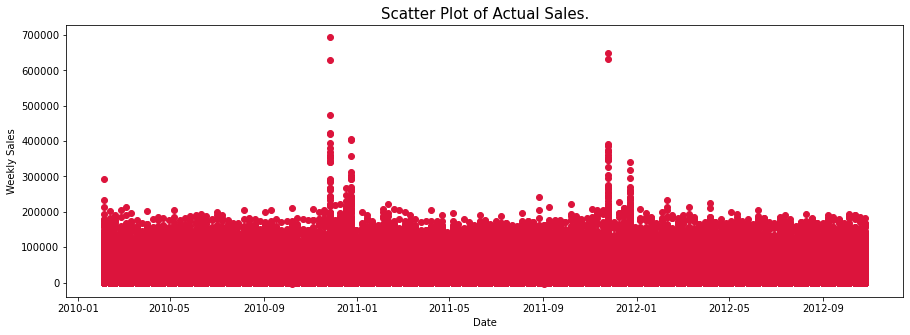

In [19]:
def scatter(dataset, column):
    plt.figure(figsize=(15,5))
    plt.scatter(df1[column] , df1['Weekly_Sales'], color = 'crimson')
    plt.title('Scatter Plot of Actual Sales.', fontsize=15)
    plt.ylabel('Weekly Sales')
    plt.xlabel(column)
    
scatter(df1, 'Date')

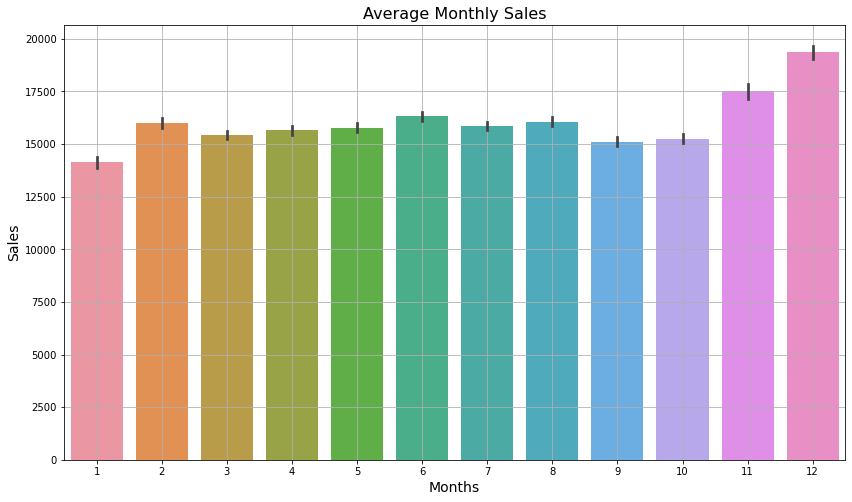

In [20]:

plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=df1)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

In [21]:
#Montly sales for each year
monthly = pd.crosstab(df1["Year"], df1["Month"], values=df1["Weekly_Sales"],aggfunc='sum')
monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.903330e+08,1.819198e+08,2.314124e+08,1.867109e+08,1.922462e+08,2.325801e+08,1.876401e+08,1.772679e+08,2.171618e+08,2.028534e+08,2.887605e+08
2011,1.637040e+08,1.863313e+08,1.793564e+08,2.265265e+08,1.816482e+08,1.897734e+08,2.299114e+08,1.885993e+08,2.208477e+08,1.832613e+08,2.101624e+08,2.880781e+08
2012,1.688945e+08,1.920636e+08,2.315097e+08,1.889209e+08,1.887665e+08,2.406103e+08,1.875095e+08,2.368508e+08,1.806455e+08,1.843617e+08,NaN,NaN


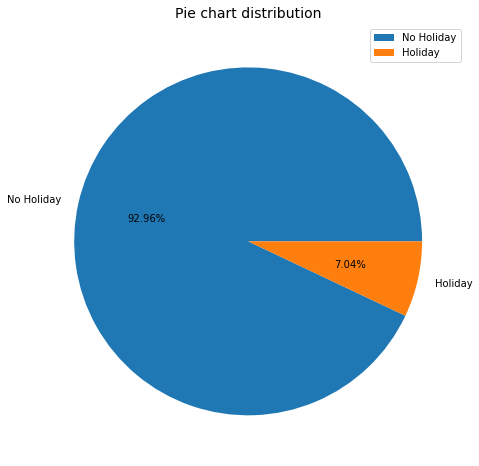

In [22]:
plt.figure(figsize=(8,8))
plt.pie(df1['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()

<AxesSubplot:xlabel='Fuel_Price'>

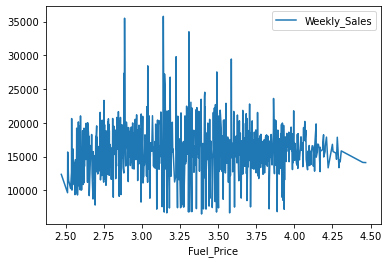

In [23]:
fuel_price = pd.pivot_table(df1, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<AxesSubplot:xlabel='Temperature'>

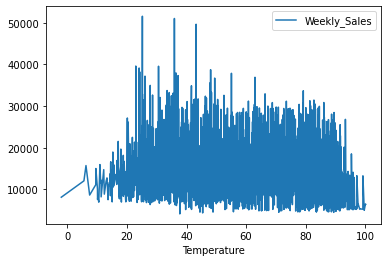

In [24]:
temp = pd.pivot_table(df1, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<AxesSubplot:xlabel='CPI'>

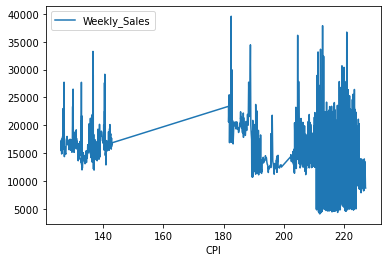

In [25]:
CPI = pd.pivot_table(df1, values = "Weekly_Sales", index= "CPI")
CPI.plot()

<AxesSubplot:xlabel='Unemployment'>

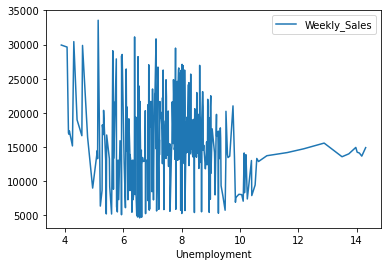

In [26]:
unemployment = pd.pivot_table(df1, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

In [27]:
type_a = df1[df1['Type'] == '1']
type_b = df1[df1['Type'] == '2']
type_c = df1[df1['Type'] == '3']

In [28]:
type_a_sales = type_a['Weekly_Sales'].sum()
type_b_sales = type_b['Weekly_Sales'].sum()
type_c_sales = type_c['Weekly_Sales'].sum()

In [29]:
print('Type A Sales:', type_a_sales)
print('Type B Sales:', type_b_sales)
print('Type C Sales:', type_c_sales)

Type A Sales: 0.0
Type B Sales: 0.0
Type C Sales: 0.0


In [30]:
df_type_a = df1[df1['Type'] == 'Type 1'] 

# Calculate the total sales for Type A stores 
total_sales_type_a = df_type_a['Weekly_Sales'].sum() 

print("Total Sales for Type A Stores:", total_sales_type_a)

Total Sales for Type A Stores: 0.0


In [31]:
store_ids = df1['Store'].unique()
store_ids

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [32]:
# splitting the data into two data frames - one for 30 stores and one for 15 stores
# first, we will select the store id's for the 30 stores
store_ids_30 = df1['Store'].unique()[:30]
df_30 = df1[df1['Store'].isin(store_ids_30)]

In [33]:
# then, we will select the store id's for the 15 stores
store_ids_15 = df1['Store'].unique()[30:]
df_15 = df1[df1['Store'].isin(store_ids_15)]

In [34]:
# splitting the 30 stores dataframe into two separate data frames - one for 20 stores and one for 10 stores 

# first, we will select the store id's for the 20 stores
store_ids_20 = df_30['Store'].unique()[:20]
df_20 = df_30[df_30['Store'].isin(store_ids_20)]

In [35]:
# then, we will select the store id's for the 10 stores
store_ids_10 = df_30['Store'].unique()[20:]
df_10 = df_30[df_30['Store'].isin(store_ids_10)]


In [36]:
# now, we will train the model on the 20 stores
X_20 = df_20.drop(['Weekly_Sales','Date'], axis=1)
y_20 = df_20['Weekly_Sales']

In [37]:
# splitting the 20 stores into train and test sets
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X_20, y_20, test_size=0.2, random_state=42)

In [38]:
# training the model
regressor_20 = LinearRegression()
regressor_20.fit(X_train_20, y_train_20)

LinearRegression()

In [39]:
# now, we will train the model on the 10 stores
X_10 = df_10.drop(['Weekly_Sales', 'Date'], axis=1)
y_10 = df_10['Weekly_Sales']

In [40]:
# splitting the 10 stores into train and test sets
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, y_10, test_size=0.2, random_state=42)

In [41]:
# training the model
regressor_10 = LinearRegression()
regressor_10.fit(X_train_10, y_train_10)


LinearRegression()

In [42]:
# now, we will merge the 20 and 10 stores and test the model 
X = pd.concat([X_train_20, X_train_10])
y = pd.concat([y_train_20, y_train_10])

In [43]:
# training the model
regressor = LinearRegression()
regressor.fit(X, y)


LinearRegression()

In [44]:
# testing the model
X_test = pd.concat([X_test_20, X_test_10])
y_test = pd.concat([y_test_20, y_test_10])

In [45]:
# predicting the output
y_pred = regressor.predict(X_test)

In [46]:
# calculating the accuracy of the model
accuracy = regressor.score(X_test, y_test)

In [47]:
print('Model accuracy: ', accuracy)

Model accuracy:  0.08236888847421675
